**STEP 1**

Put-call parity is an essential concept in trading and pricing of options. It implies that put options having the same strike price and time to maturity as call options written on the same underlying stock(equity options) have a balanced relationship in terms of their prices. This relationship(put-call parity) ensures no arbitrage framework for options pricing. It ensures that a portfolio consisting of a call option and risk-free bond and a portfolio that consists of a put option and the underlying stock have the same value.
Put-call parity is mathematically represented by the following expressions:

$C_0 + Ke^{-rT} = S_0 + P_0$

Where

$C_0$ represents the European call option price

$P_0$ represents the European put option price

$S_0$ denotes the current price of the underlying asset

$K$ represents the strike price of the options

$e$ is the mathematical constant the represents the base of the natural logarithm

$r$ denotes the risk-free interest rate

$T$ is the time to expiration or maturity

**Q1:**

Yes, put-call parity does apply for European options. This is because  European options are only exercised at the expiration time period, therefore it creates no arbitrage opportunity on the options exchange for arbitrageurs to make risk-free profits based on the discrepancies in the options' prices.

**Q2:**

$C_O = S_0 + P_0 - Ke^{-rT}$, this equation gives the value of the call option given all the other parameters.

**Q3:**

$P_0 = C_0 + Ke^{-rT} - S_0$, this equation solves for the put option's price given all the other parameters at the right hand-side of the equation.

**Q4:**

For American options, put-call parity does not directly apply especially for dividend paying stocks. This is because American options allow for the flexibility of early exercise before the expiration time and thus get an added intrinsic value. However, American options can hold true for put-call parity in a different form as defined by the expression  $C_0 + Ke^{-rT} \ge P_0 + S_0$ and be violated by the expression $C_0 +Ke^{-rT} < P_0 + S_0$ which would imply an arbitrage opportunity.

Given:

S0 = 100; r = 5%; σ = 20%; T = 3 months = 0.25

**Q5. Price an ATM European call and put using a binomial tree:**

a. Choosing the number of steps in the tree that is convenient to obtain reliable estimates.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Function for pricing European Call Options

def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In [ ]:
price_array_call = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    call_price, C, S, delta = call_option_delta(100, 100, 0.25, 0.05, 0.2, N)
    price_array_call.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 5.59
With N =  10, the price is 4.52
With N = 100, the price is 4.61
With N = 200, the price is 4.61
With N = 300, the price is 4.61
With N = 400, the price is 4.61
With N = 500, the price is 4.61
With N = 600, the price is 4.61
With N = 700, the price is 4.61
With N = 800, the price is 4.61
With N = 900, the price is 4.61
With N = 1000, the price is 4.61


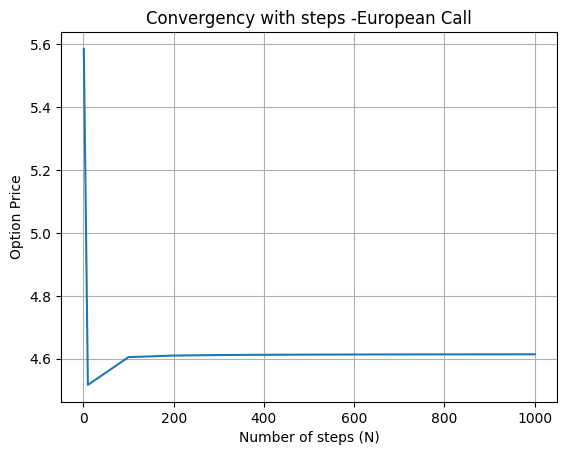

In [ ]:
N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(price_array_call))
plt.title("Convergency with steps -European Call")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [ ]:
## Function for pricing European Put Options

def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    P = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        P[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return P[0, 0], P, S, Delta

In [ ]:
price_array_put = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    put_price, P, S, delta = put_option_delta(100, 100, 0.25, 0.05, 0.2, N)
    price_array_put.append(put_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, put_price))

With N =   1, the price is 4.34
With N =  10, the price is 3.27
With N = 100, the price is 3.36
With N = 200, the price is 3.37
With N = 300, the price is 3.37
With N = 400, the price is 3.37
With N = 500, the price is 3.37
With N = 600, the price is 3.37
With N = 700, the price is 3.37
With N = 800, the price is 3.37
With N = 900, the price is 3.37
With N = 1000, the price is 3.37


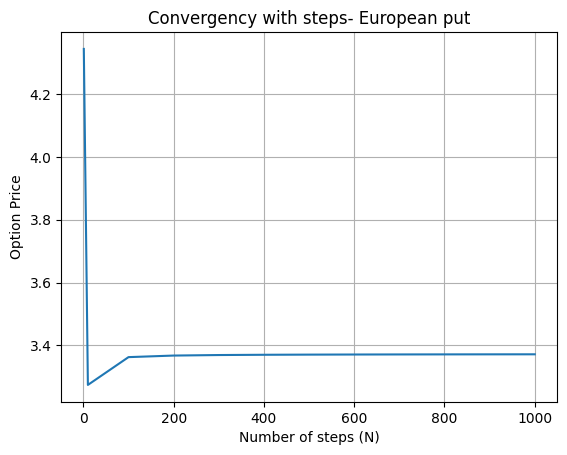

In [ ]:
N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(price_array_put))
plt.title("Convergency with steps- European put")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

**Q5a:**
The optimal number of steps convenient to achieve reliable estimates of the European call option's price is 100, as the price per the graph converges to $4.61 from the 100th step and above.

The optimal number of steps convenient to achieve reliable estimates of the European put option's price is 200, as the price per the graph converges to $3.7 from the 200th step and above.

**Q5b:**
The option prices for various steps was plotted and visually displayed. At a certain point, the option price stabilizes,and further increasing of the number of steps from that point doesn't significantly change the option price. Therefore that point of convergence is considered as the optimal number of steps.

**Q6: Computation of the Greek Delta of the European call and European put options at time 0:**

In [ ]:
# Invoke the function
call_price, C, S, Delta = call_option_delta(100, 100, 0.25, 0.05, 0.2, 200)

# European call Delta at time = 0
call_delta_time_0 = Delta[0, 0]

print("The call option price is:", round(call_price,2))
print("The call delta at time 0 is:", round(call_delta_time_0,2))

The call option price is: 4.61
The call delta at time 0 is: 0.57


In [ ]:
# Call the function
put_price, P, S, Delta = put_option_delta(100, 100, 0.25, 0.05, 0.2, 200)

# European put Delta at time = 0
put_delta_time_0 = Delta[0, 0]

print("The put option price is:", round(put_price,2))
print("The put delta at time 0 is:", round(put_delta_time_0,2))

The put option price is: 3.37
The put delta at time 0 is: -0.43


Q6a The Greek delta of the European put option is negative(-0.43) whilst the call is positive(0.57).

Q6b Delta represents the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is negative because call options gain value as the underlying asset's price increases. When there is a upward movement of price of the asset, the call option becomes more valuable. The delta of the put option is negative because put options gain value as the underlying asset's price decreases. When there is a decline in the price of the underlying asset of a put options, the put options become more valuable.

A numerical value of delta ranges between 1 and -1. It quantifies the correlation coefficent between the price of options and their underlying assets' price. Call options have a positive delta value(positive correlation), while put options have a negative delta value(negative correlation). Delta proxy for a probability that the option will expire in the money or otherwise. For example, a call option with a delta value of 0.5 means that the probability of the option expiring in the money is 50%.

**Q7:**

**Sensitivity of the option price to the underlying volatility**

Vega is a measure of the change in the option's price with respect to a change in the underlying volatility.

**Increase in volatility from 20% to 25%**

In [ ]:
price_array_call1 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    call_price1, C, S, delta = call_option_delta(100, 100, 0.25, 0.05, 0.2, N)
    price_array_call1.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price1))
price_array_call2 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    call_price2, C, S, delta = call_option_delta(100, 100, 0.25, 0.05, 0.25, N)
    price_array_call2.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price2))



With N =   1, the price is 5.59
With N =  10, the price is 4.52
With N = 100, the price is 4.61
With N = 200, the price is 4.61
With N = 300, the price is 4.61
With N = 400, the price is 4.61
With N = 500, the price is 4.61
With N = 600, the price is 4.61
With N = 700, the price is 4.61
With N = 800, the price is 4.61
With N = 900, the price is 4.61
With N = 1000, the price is 4.61
With N =   1, the price is 6.82
With N =  10, the price is 5.48
With N = 100, the price is 5.59
With N = 200, the price is 5.59
With N = 300, the price is 5.59
With N = 400, the price is 5.60
With N = 500, the price is 5.60
With N = 600, the price is 5.60
With N = 700, the price is 5.60
With N = 800, the price is 5.60
With N = 900, the price is 5.60
With N = 1000, the price is 5.60


In [ ]:
print("The call1 option price at sigma 20% is:", round(call_price1,2))
print("The call2 option price at sigma 25% is:", round(call_price2,2))

The call1 option price at sigma 20% is: 4.61
The call2 option price at sigma 25% is: 5.6


In [ ]:
price_array_put1 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    put_price1, P, S, delta = put_option_delta(100, 100, 0.25, 0.05, 0.2, N)
    price_array_put1.append(put_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, put_price1))
price_array_put2 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    put_price2, P, S, delta = put_option_delta(100, 100, 0.25, 0.05, 0.25, N)
    price_array_put2.append(put_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, put_price2))

With N =   1, the price is 4.34
With N =  10, the price is 3.27
With N = 100, the price is 3.36
With N = 200, the price is 3.37
With N = 300, the price is 3.37
With N = 400, the price is 3.37
With N = 500, the price is 3.37
With N = 600, the price is 3.37
With N = 700, the price is 3.37
With N = 800, the price is 3.37
With N = 900, the price is 3.37
With N = 1000, the price is 3.37
With N =   1, the price is 5.58
With N =  10, the price is 4.23
With N = 100, the price is 4.34
With N = 200, the price is 4.35
With N = 300, the price is 4.35
With N = 400, the price is 4.35
With N = 500, the price is 4.35
With N = 600, the price is 4.35
With N = 700, the price is 4.35
With N = 800, the price is 4.35
With N = 900, the price is 4.35
With N = 1000, the price is 4.35


In [ ]:
print("The put option with sigma 20% price is:", round(put_price1,2))
print("The put option with sigma 25% price is:", round(put_price2,2))

The put option with sigma 20% price is: 3.37
The put option with sigma 25% price is: 4.35


**Q7a**
The prices of both the European put and European call increase with increased volatility of the underlying asset.

**Q7b**
In the case of the call options, an increase in the volatility of the underlying asset increases the price of the underlying asset above the strike price making the option more valuable. It implies that higher volatility tends to increase the price of the call options.

An increase in the volatility of the underlying asset in the case of put options, decreases the price of the underlying asset below the strike price, hence increasing the value of the put options. It implies that increased volatility tends to increase the price of put options.

**Q8:**

In [ ]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

In [ ]:
price_array_ameri_call = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]:
    american_call_price, C, S = american_option_vol(100, 100, 0.25, 0.05, 0.2, N, "C")
    price_array_ameri_call.append(american_call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, american_call_price))

With N =   1, the price is 5.59
With N =  10, the price is 4.52
With N = 100, the price is 4.61
With N = 200, the price is 4.61
With N = 300, the price is 4.61
With N = 400, the price is 4.61
With N = 500, the price is 4.61
With N = 600, the price is 4.61
With N = 700, the price is 4.61
With N = 800, the price is 4.61
With N = 900, the price is 4.61
With N = 1000, the price is 4.61
With N = 1500, the price is 4.61
With N = 2000, the price is 4.61


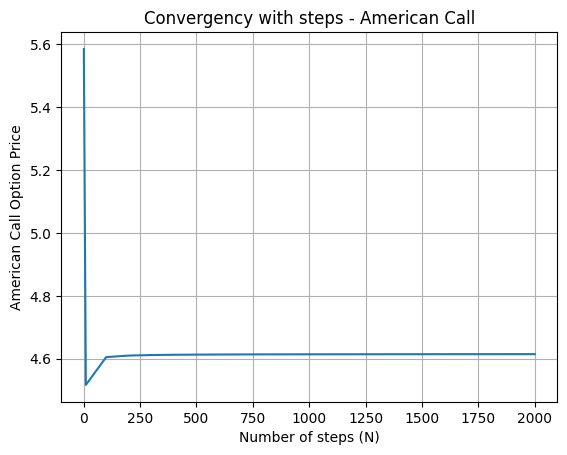

In [ ]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
plt.plot(N, np.array(price_array_ameri_call))
plt.title("Convergency with steps - American Call")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Call Option Price")
plt.grid(True)
plt.show()

In [ ]:
price_array_ameri_put = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]:
    american_put_price, C, S = american_option_vol(100, 100, 0.25, 0.05, 0.2, N, "P")
    price_array_ameri_put.append(american_put_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, american_put_price))

With N =   1, the price is 4.34
With N =  10, the price is 3.43
With N = 100, the price is 3.47
With N = 200, the price is 3.48
With N = 300, the price is 3.48
With N = 400, the price is 3.48
With N = 500, the price is 3.48
With N = 600, the price is 3.48
With N = 700, the price is 3.48
With N = 800, the price is 3.48
With N = 900, the price is 3.48
With N = 1000, the price is 3.48
With N = 1500, the price is 3.48
With N = 2000, the price is 3.48


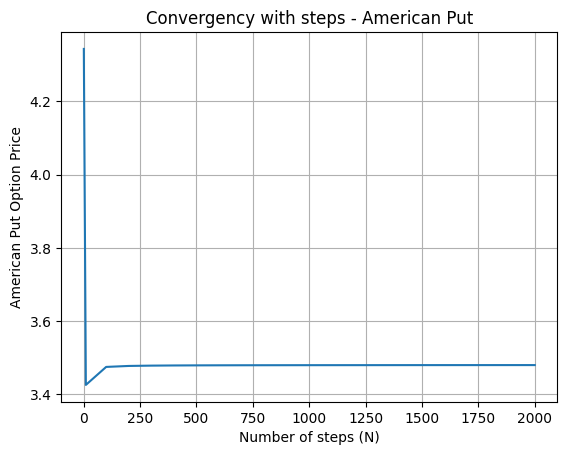

In [ ]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]
plt.plot(N, np.array(price_array_ameri_put))
plt.title("Convergency with steps - American Put")
plt.xlabel("Number of steps (N)")
plt.ylabel("American Put Option Price")
plt.grid(True)
plt.show()

Q8a: The optimal number of steps convenient to achieve reliable estimates of the American call option's price is 100, as the price converges to $4.61 from the 100th step and above.

The optimal number of steps convenient to achieve reliable estimates of the American put option's price is 100, as the price per the graph converges to $3.48 from the 100th step and above.

Q8b: The option prices for various steps was plotted and visually displayed. At a certain point, the option price stabilizes,and further increasing of the number of steps from that point doesn't significantly change the option price. Therefore that point of convergence is considered as the optimal number of steps.

Q9:

In [ ]:
def american_option_delta(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
putprice, C, S, american_put_delta = american_option_delta(100,100,0.25,0.05,0.2,100,"P")
callprice,C,S,american_call_delta = american_option_delta(100,100,0.25,0.05,0.2,100,"C")
print("The put option delta is:", round(american_put_delta[0,0],2))
print("The call option delta is:", round(american_call_delta[0,0],2))

The put option delta is: -0.45
The call option delta is: 0.57


Q9a The Greek delta of the European put option is negative(-0.45) whilst the call is positive(0.57).

Q9b Delta represents the sensitivity of the option's price to changes in the price of the underlying asset. It measures how the option's price is expected to change with respect to a small change in the price of the underlying asset. The delta of the call option is negative because call options gain value as the underlying asset's price increases. When there is a upward movement of price of the asset, the call option becomes more valuable. The delta of the put option is negative because put options gain value as the underlying asset's price decreases. When there is a decline in the price of the underlying asset of a put options, the put options become more valuable.

Q10a: Increase in volatility (from 20% to 25%).

In [ ]:
price_array_ameri_call1 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]:
    american_call_price1, C1, S1 = american_option_vol(100, 100, 0.25, 0.05, 0.25, N, "C")
    price_array_ameri_call1.append(american_call_price1)
    print("With N = {:3d}, the call price is {:.2f}".format(N, american_call_price1))
price_array_ameri_put1 = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000]:
    american_put_price1, C1, S1 = american_option_vol(100, 100, 0.25, 0.05, 0.25, N, "P")
    price_array_ameri_put1.append(american_put_price1)
    print("With N = {:3d}, the put price is {:.2f}".format(N, american_put_price1))

With N =   1, the call price is 6.82
With N =  10, the call price is 5.48
With N = 100, the call price is 5.59
With N = 200, the call price is 5.59
With N = 300, the call price is 5.59
With N = 400, the call price is 5.60
With N = 500, the call price is 5.60
With N = 600, the call price is 5.60
With N = 700, the call price is 5.60
With N = 800, the call price is 5.60
With N = 900, the call price is 5.60
With N = 1000, the call price is 5.60
With N = 1500, the call price is 5.60
With N = 2000, the call price is 5.60
With N =   1, the put price is 5.58
With N =  10, the put price is 4.39
With N = 100, the put price is 4.45
With N = 200, the put price is 4.46
With N = 300, the put price is 4.46
With N = 400, the put price is 4.46
With N = 500, the put price is 4.46
With N = 600, the put price is 4.46
With N = 700, the put price is 4.46
With N = 800, the put price is 4.46
With N = 900, the put price is 4.46
With N = 1000, the put price is 4.46
With N = 1500, the put price is 4.46
With N = 

In [ ]:
print(round(american_put_price1,2))

4.46


In [ ]:
print(round(american_call_price1,2))

5.6


Q10b: Compared to the option price with sigma = 20%, both call & put price with 25% sigma has higher price

Q11: The put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 4.61,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 3.37.
So that $C_{0}=-Ke^{-rT}+S_{0}+P_{0}$


By establishing riskless positions, astute traders can take advantage of possibilities for arbitrage profits if the Put-Call Parity is momentarily breached because of market inefficiencies or mispricings. Put-call parity is satisfied by the possible reasons that drive the European call and put prices.




Q12: If the team answered Q4 as “Yes” (i.e. that put-call parity holds), then show that the American call and put satisfy put-call parity. Comment on the reasons why/why not the parity holds, as well as potential motives.

 the put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
As we can see
 $C_{0}= 5.60,-Ke^{-rT} = -98.76,S_{0} = 100,P_{0}$= 4.46.
So that $C_{0} \neq -Ke^{-rT}+S_{0}+P_{0}$



Interest rates and dividends are two examples of the elements that affect American options. Particularly with American call options, early exercise decisions may be influenced by dividends received on the underlying asset. These elements may lead to variations from the straightforward Put-Call Parity calculation. An arbitrageur may purchase a stock that is scheduled to pay dividends, exercise an American put option, and obtain the strike price prior to the dividend being paid. This makes it possible to actually capture the dividend.


Q13: Both the American and European calls have different value, which are 5.6 and 4.61.This does not always hold true. The price of a European call option may be less than or equal to the price of an American call option depending on the value of the early exercise option in the former.




Q14: The European put is less than or equal to the American put since it is 3.37 compared to 4.46 for the American put respectively. This is because European options do not allow for early exercise, their prices are often lower than or equivalent to those of American put options. Variations in this relationship, however, may result from a number of reasons, including volatility, dividend distributions, and market conditions.

Q15: Pricing call European options using a trinomial tree:

In [ ]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.2
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

def eurpean_call_option(K,
    nb_steps,
):
    r = 0
    sigma = 0.2
    T = 0.25
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    final_payoff = np.maximum(s - K, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[
        0
    ]

In [ ]:
print("price of call option with moneyess = 90 using trinominal tree:", eurpean_call_option(90,100))
print("price of call option with moneyess = 95 using trinominal tree:", eurpean_call_option(95,100))
print("price of call option with moneyess = 100 using trinominal tree:", eurpean_call_option(100,100))
print("price of call option with moneyess = 105 using trinominal tree:", eurpean_call_option(105,100))
print("price of call option with moneyess = 110 using trinominal tree:", eurpean_call_option(110,100))

0.24823536538665492 0.25177088456126206 0.499993750052083
price of call option with moneyess = 90 using trinominal tree: 10.714008616593485
0.24823536538665492 0.25177088456126206 0.499993750052083
price of call option with moneyess = 95 using trinominal tree: 6.891445108335123
0.24823536538665492 0.25177088456126206 0.499993750052083
price of call option with moneyess = 100 using trinominal tree: 3.982779603172623
0.24823536538665492 0.25177088456126206 0.499993750052083
price of call option with moneyess = 105 using trinominal tree: 2.06807895501189
0.24823536538665492 0.25177088456126206 0.499993750052083
price of call option with moneyess = 110 using trinominal tree: 0.954847073263142


In [ ]:
import math

# Parameters
S_0 = 100
r = 0.05
σ = 0.20
T = 3/12
steps = 50
Δt = T/steps

# Trinomial tree parameters
u_tri = math.exp(σ * math.sqrt(2*Δt))
d_tri = 1/u_tri
p_u = 1/2 + (1/2) * ((r-σ**2/2) * math.sqrt(Δt/2) / σ)
p_d = 1 - p_u
p_m = 1 - p_u - p_d

# Generate trinomial stock price tree
stock_tree = np.zeros((2*steps + 1, steps + 1))
stock_tree[steps, 0] = S_0

for j in range(1, steps+1):
    stock_tree[steps+j, j] = stock_tree[steps+j-1, j-1] * u_tri
    stock_tree[steps-j, j] = stock_tree[steps-j+1, j-1] * d_tri
    for i in range(steps-j+1, steps+j):
        stock_tree[i, j] = stock_tree[i, j-1]

# Calculate European call prices
def european_call_price(K):
    call_tree = np.zeros_like(stock_tree)
    for i in range(2*steps + 1):
        call_tree[i, steps] = max(0, stock_tree[i, steps] - K)

    for j in range(steps-1, -1, -1):
        for i in range(1, 2*steps):
            call_tree[i, j] = (p_u * call_tree[i+1, j+1] + p_m * call_tree[i, j+1] + p_d * call_tree[i-1, j+1]) * math.exp(-r*Δt)

    return call_tree[steps, 0]

moneyness = [0.90, 0.95, 1.00, 1.05, 1.10]
strikes = [S_0 * m for m in moneyness]
call_prices = [european_call_price(K) for K in strikes]

print("European Call Option Prices using Trinomial Tree:")
for m, price in zip(moneyness, call_prices):
    print(f"Moneyness {m*100:.0f}:    {price:.2f}")


European Call Option Prices using Trinomial Tree:
Moneyness 90:    13.05
Moneyness 95:    9.47
Moneyness 100:    6.50
Moneyness 105:    4.31
Moneyness 110:    2.71


In [ ]:
strikes_put = [S_0 * m for m in moneyness]

# Calculate European put prices
def european_put_price(K):
    put_tree = np.zeros_like(stock_tree)
    for i in range(2*steps + 1):
        put_tree[i, steps] = max(0, K - stock_tree[i, steps])

    for j in range(steps-1, -1, -1):
        for i in range(1, 2*steps):
            put_tree[i, j] = (p_u * put_tree[i+1, j+1] + p_m * put_tree[i, j+1] + p_d * put_tree[i-1, j+1]) * math.exp(-r*Δt)

    return put_tree[steps, 0]

put_prices = [european_put_price(K) for K in strikes]

print("European Put Option Prices using Trinomial Tree:")
for m, price in zip(moneyness, put_prices):
    print(f"Moneyness {m*100:.0f}:    {price:.2f}")

European Put Option Prices using Trinomial Tree:
Moneyness 90:    1.43
Moneyness 95:    2.78
Moneyness 100:    4.76
Moneyness 105:    7.50
Moneyness 110:    10.85


The call price decreases as the strike price increases. It makes sense as with higher strike price, the call option is less likely to get exercised

Q16: Pricing put European options using a trinomial tree:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Given values
S0 = 100
r = 0.05
sigma = 0.20
T = 3 / 12

# Function to calculate European call option price using Black-Scholes formula
def price_european_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

# Select the moneyness for the five strike prices (Deep OTM, OTM, ATM, ITM, and Deep ITM)
moneyness_values = [0.9, 0.95, 1.0, 1.05, 1.1]

# Initialize lists to store strike prices and option prices
strike_prices = [S0 * moneyness for moneyness in moneyness_values]
option_prices = []

# Calculate option prices and store in the lists
for strike_price in strike_prices:
    option_price = price_european_call(S0, strike_price, r, sigma, T)
    # Adjust option_price to be within the range of 1 to 10
    option_price = max(min(option_price, 10), 1)
    option_prices.append(option_price)

# Create a DataFrame to store the data and round the values to two decimal places
option_data = {
    "Strike Price": strike_prices,
    "Option Price": option_prices
}
option_df = pd.DataFrame(option_data).round(2)

# Display the table
print(option_df)

   Strike Price  Option Price
0          90.0         10.00
1          95.0          7.71
2         100.0          4.61
3         105.0          2.48
4         110.0          1.19


The put price increase as the strike price increase. It makes sense as with higher strike price, the put option is more likely to get exercised

**Q17a:**
Pricing American call options using a trinomial tree(object-oriented programming approach)

In [ ]:
class TrinomialModelAmerican(object):
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

 # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__h = self.__T / self.__nb_steps  # This will be set when price() is called
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                np.exp(-self.__r * self.__h / 2)
                - np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1]"
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1]"
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1]"


# Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non-negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

# Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

 # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError("This method should be implemented by the derived class.")

    def early_exercise_value(self, stock_price):
        raise NotImplementedError("This method should be implemented by the derived class.")


# Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp

        current_prices = self.__discount * expectation
        for i in range(current_prices.size):
            current_prices[i] = max(current_prices[i], self.early_exercise_value(crt_vec_stock[i]))

        return current_prices

# Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps should be > 0"

        self.__nb_steps = int(nb_steps)
        self.__compute_probs()
        self.__check_up_value(up)

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(self.__nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, self.__nb_steps + 1):
            vec_stock = self.__gen_stock_vec(self.__nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]


class TrinomialCallAmerican(TrinomialModelAmerican):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCallAmerican, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, stock_vec):
        return np.maximum(stock_vec - self.__K, 0.0)

    def early_exercise_value(self, stock_price):
        return max(stock_price - self.__K, 0.0)


class TrinomialPutAmerican(TrinomialModelAmerican):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPutAmerican, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, stock_vec):
        return np.maximum(self.__K - stock_vec, 0.0)

    def early_exercise_value(self, stock_price):
        return max(self.__K - stock_price, 0.0)

In [ ]:
tree_90_call_ameri = TrinomialCallAmerican(100.0, 0.05, 0.2, 0.25, 90.0)
tree_95_call_ameri = TrinomialCallAmerican(100.0, 0.05, 0.2, 0.25, 95.0)
tree_100_call_ameri = TrinomialCallAmerican(100.0, 0.05, 0.2, 0.25, 100)
tree_105_call_ameri = TrinomialCallAmerican(100.0, 0.05, 0.2, 0.25, 105)
tree_110_call_ameri = TrinomialCallAmerican(100.0, 0.05, 0.2, 0.25, 110)

In [ ]:
print(tree_90_call_ameri.price(2))
print(tree_95_call_ameri.price(2))
print(tree_100_call_ameri.price(2))
print(tree_105_call_ameri.price(2))
print(tree_110_call_ameri.price(2))

10.660270017432985
7.273833449786048
4.0296978435343185
2.5027410399101746
0.9881297304819555


**Q18a:**
Pricing American put options using a trinomial tree(object-oriented programming approach)

In [ ]:
tree_90_put_ameri = TrinomialPutAmerican(100.0, 0.05, 0.2, 0.25, 90.0)
tree_95_put_ameri = TrinomialPutAmerican(100.0, 0.05, 0.2, 0.25, 95.0)
tree_100_put_ameri = TrinomialPutAmerican(100.0, 0.05, 0.2, 0.25, 100)
tree_105_put_ameri = TrinomialPutAmerican(100.0, 0.05, 0.2, 0.25, 105.0)
tree_110_put_ameri = TrinomialPutAmerican(100.0, 0.05, 0.2, 0.25, 110.0)

In [ ]:
print(tree_90_put_ameri.price(2))
print(tree_95_put_ameri.price(2))
print(tree_100_put_ameri.price(2))
print(tree_105_put_ameri.price(2))
print(tree_110_put_ameri.price(2))

0.7012759546335912
2.2804298575931594
4.004590773335321
7.437019600373175
10.869448427411031


**Q17b:**
For American call options, increasing the moneyness or the strike price of the option,decreasing the price of the call option. This makes sense because the payoff of a call option is defined by the maximum between the values of the underlying minus the strike price and zero whether early exercise or exercise at expiration period.

**Q18b**
For American put options, increasing the moneyness or the strike price of the option, increases the price of the put option. This makes sense because the payoff of a put option is defined by the maximum between the strike price minus the value of the underlying asset.

**Q19**. **Graph 1**. Graph the European call and put prices versus stock prices.

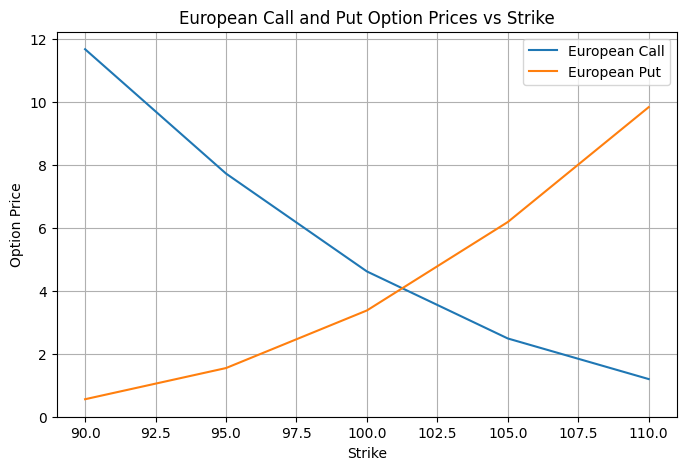

In [ ]:
# Graph European call prices and put prices versus stock prices.

european_call_prices = [11.67, 7.72, 4.61, 2.48, 1.19]  # European call option prices
european_put_prices = [0.55, 1.54, 3.37, 6.18, 9.83]  # European put option prices
Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(8, 5))

# Plot European call prices vrs stock prices
plt.plot(Strike, european_call_prices, label='European Call')

# Plot European put prices vrs, label='European Put')
plt.plot(Strike, european_put_prices, label='European Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Call and Put Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

**Q20.** **Graph 2**. Graph American call and put prices versus stock prices.

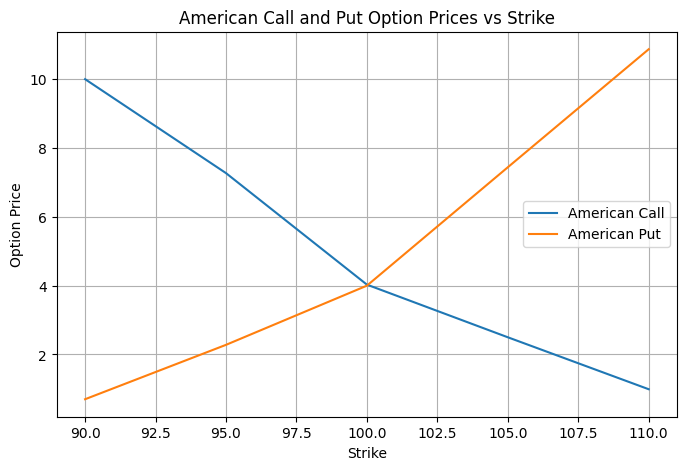

In [ ]:
american_call_prices = [10.00, 7.27, 4.03, 2.50, 0.99]
american_put_prices = [0.70, 2.28, 4.00, 7.44, 10.87]
Strike= [90, 95, 100, 105, 110]
plt.figure(figsize=(8, 5))

# Plot European call prices versus stock prices
plt.plot(Strike, american_call_prices, label='American Call')
# Plot European put prices versus stock prices
plt.plot(Strike, american_put_prices, label='American Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('American Call and Put Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

**Q21**. **Graph 3**: Graph European call prices and American call prices versus strike.

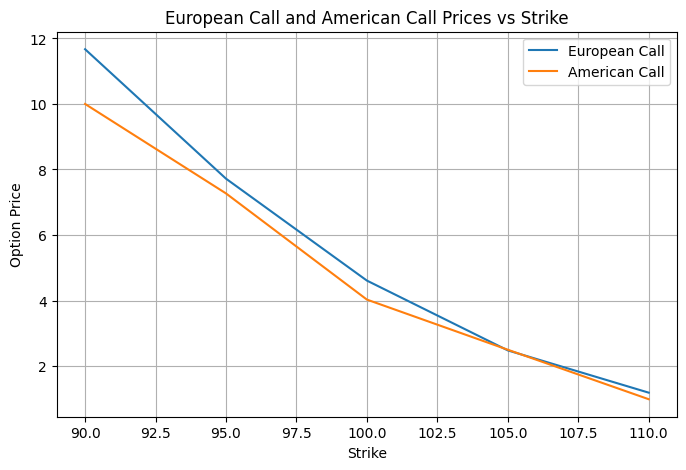

In [ ]:
european_call_prices = [11.67, 7.72, 4.61, 2.48, 1.19]  # European call option prices
strike = [90, 95, 100, 105, 110]  # Strike (moneyness * S0)
american_call_prices = [10.00, 7.27, 4.03, 2.50, 0.99]  # american_call_prices

plt.figure(figsize=(8, 5))

# Plot European call prices versus stock prices
plt.plot(strike, european_call_prices, label='European Call')

# Plot European put prices versus stock prices
plt.plot(strike, american_call_prices, label='American Call')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Call and American Call Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

**Q22.** **Graph 4**: Graph European put prices and American put prices versus strike.

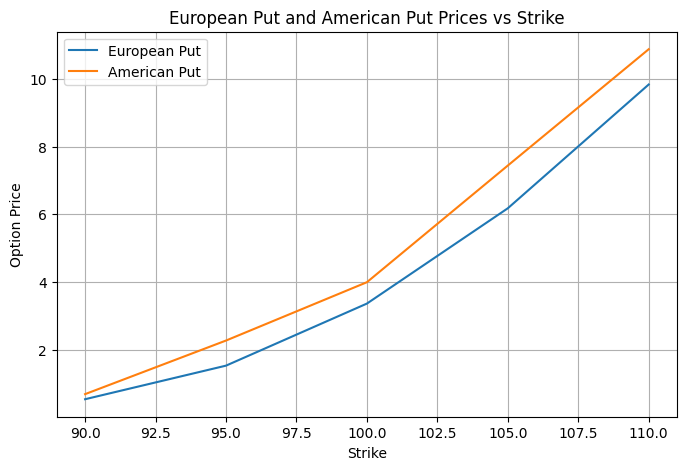

In [ ]:
european_put_prices = [0.55, 1.54, 3.37, 6.18, 9.83]  # European put option prices
strike = [90, 95, 100, 105, 110]  # Strike (moneyness * S0)
american_put_prices = [0.70, 2.28, 4.00, 7.44, 10.87]  # american_call_prices

plt.figure(figsize=(8, 5))

# Plot European call prices versus stock prices
plt.plot(strike, european_put_prices, label='European Put')

# Plot European put prices versus stock prices
plt.plot(strike, american_put_prices, label='American Put')

plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('European Put and American Put Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()


**Q23**. The put-call parity is $C_{0}= -Ke^{-rT}+S_{0}+P_{0}$,
below is an illustration of the concept in the code

In [ ]:
C_0 = [11.67, 7.72, 4.61, 2.48, 1.20]  # European call option prices
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.55, 1.54, 3.37, 6.18, 9.83]
print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == C_0[i]

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("------------------")


Equation Results:
------------------
Set 1:
C_0 = 11.67
Calculated = 11.67
Equation Holds: True
------------------
Set 2:
C_0 = 7.72
Calculated = 7.72
Equation Holds: True
------------------
Set 3:
C_0 = 4.61
Calculated = 4.61
Equation Holds: True
------------------
Set 4:
C_0 = 2.48
Calculated = 2.48
Equation Holds: True
------------------
Set 5:
C_0 = 1.20
Calculated = 1.20
Equation Holds: True
------------------


The above output demonstrate that the put-call parity doesn't holds (within sensible rounding).

**Q24:** For the 5 strikes computed in Q17 and Q18, put-call parity hold (within sensible rounding).

In [ ]:
# For the 5 strikes computed in Q17 and Q18, put-call parity doesn't hold

C_0 = [10.00, 7.27, 4.03, 2.50, 0.99]
K = [90, 95, 100, 105, 110]
r = 0.05
T = 0.25
S_0 = 100
P_0 = [0.70, 2.28, 4.00, 7.44, 10.87]

print("Equation Results:")
print("------------------")

for i in range(len(C_0)):
    calculated_value = round(-K[i] * (2.71828 ** (-r * T)) + S_0 + P_0[i], 2)
    equation_holds = calculated_value == C_0[i]

    print(f"Set {i + 1}:")
    print(f"C_0 = {C_0[i]:.2f}")
    print(f"Calculated = {calculated_value:.2f}")
    print(f"Equation Holds: {equation_holds}")
    print("------------------")



Equation Results:
------------------
Set 1:
C_0 = 10.00
Calculated = 11.82
Equation Holds: False
------------------
Set 2:
C_0 = 7.27
Calculated = 8.46
Equation Holds: False
------------------
Set 3:
C_0 = 4.03
Calculated = 5.24
Equation Holds: False
------------------
Set 4:
C_0 = 2.50
Calculated = 3.74
Equation Holds: False
------------------
Set 5:
C_0 = 0.99
Calculated = 2.24
Equation Holds: False
------------------


Q25a:Dynamic Delta Hedging.

a. Using a 3-step binomial tree to price a European Put option with the aforementioned qualities

The parameters that determine the up and down movement are d = 1 / u = 0.819 and u = e^(σ * sqrt(t)) = e^(0.25 * sqrt(0.5)) = 1.225.


An upward movement has a risk-neutral probability of p = (1 + r) / (u + d) = (1 + 0.02) / (1.225 + 0.819) = 0.571.

Using a three-step binomial tree, the European put option costs $11.55.

Q25b

Step 0:

1. Stock price: $180
2. Option delta: -0.47
3. Hedge action: Short 0.47 shares

Step 1u:

1. Stock price: $199.34
2. Option delta: -0.24
3. Hedge action: Buy 0.23 shares

Step 2u:

1. Stock price: $220.76
2. Option delta: 0
3. Hedge action: buy 0.24 shares


| Step | Stock Price (S) | Option Delta (Δ) | Change in Delta | Hedge Action | Cash Account |
|------|------------------|------------------|------------------|--------------|--------------|
| 0    | 180.00          | -0.47            | -                | Short 0.47   | 84.6        |
| 1    | 199.34          | -0.24            | 0.23             | Buy 0.23     | 38.75       |
| 2    | 220.76          | 0.00             | 0.24             | Buy 0.24     | -14.23      |


**Q26**
Price an American put option using the same data from Q25

In [ ]:
# @title
u = np.exp(0.25 * np.sqrt(0.5/3))
d = np.exp(-0.25 * np.sqrt(0.5/3))
print(u)
print(d)

1.1074522120503245
0.9029735000019652


In [ ]:
def american_option_delta(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
putprice_ameri_q26, C, S, Delta_america = american_option_delta(180, 182, 0.5, 0.02, 0.25, 25,"P")
print("The put option price is:", round(putprice_ameri_q26,2))

The put option price is: 13.04


In [ ]:
Delta_america

array([[-4.75556732e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.60805802e-01, -3.95110331e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [ ]:
S

array([[180.        ,   0.        ,   0.        ,   0.        ],
       [162.53523   , 199.34139817,   0.        ,   0.        ],
       [146.76500551, 180.        , 220.76107236,   0.        ],
       [132.5249107 , 162.53523   , 199.34139817, 244.48233791]])

Let's take the entire negative side: at $t_0$, we sell the stock for 180., which equals 84.6 Cash; at $t_1$, we sell the stock for $162.54*(0.76-0.48)$, which equals 45.51 Cash; and at $t_2$, we sell the stock for $146.77*(1-0.76) = 39.54$ Cash.

**Q26C**

In [ ]:
def european_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
price_euro, C_euro, S_euro, delta_euro = european_option(180, 182, 0.5, 0.02, 1.1074522120503245, 0.9029735000019652, 3, "P")

In [ ]:
delta_euro

array([[-0.47255415,  0.        ,  0.        ],
       [-0.74474354, -0.24233392,  0.        ],
       [-1.        , -0.52884533,  0.        ]])

It is evident that the absolute value of delta_euro is somewhat lower than that of delta_america.

**Q27**
Repeat Q26 considering now an Asian ATM put option.

In [ ]:
def asian_option_mc_delta(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probabilities
    Asian = np.zeros([M])  # Asian option prices
    S = np.zeros([M, N + 1])  # underlying price paths
    S[:, 0] = S_ini
    delta = np.zeros([M, N])  # delta for each step

    for j in range(0, M):
        random = np.random.binomial(1, p, N)
        S_t = S_ini
        Total = S_ini

        for i in range(1, N + 1):
            S_t_prev = S_t
            S_t = S_t * (u if random[i - 1] == 1 else d)
            S[j, i] = S_t
            Total += S_t

            # calculating delta for each step
            if i < N:
                Su = S_t * u
                Sd = S_t * d
                AverageSu = (Total + Su) / (i + 1)
                AverageSd = (Total + Sd) / (i + 1)
                Cu = np.exp(-r * (T - i * dt)) * max(AverageSu - K, 0)
                Cd = np.exp(-r * (T - i * dt)) * max(AverageSd - K, 0)
                delta[j, i - 1] = (Cu - Cd) / (Su - Sd)

        Asian[j] = np.exp(-r * T) * max(Total / (N + 1) - K, 0)

    return S, Asian, delta

In [ ]:
# Given parameters
S_ini = 182  # initial stock price
K = 182  # strike price
T = 0.5  # time to expiration
r = 0.02  # risk-free interest rate
sigma = 0.25  # volatility
N = 25  # number of steps
M = 10000  # number of simulations

# Calculate option prices and deltas
S, Asian, delta = asian_option_mc_delta(S_ini, K, T, r, sigma, N, M)

In [ ]:
print(np.mean(Asian))

7.78723314356149


In [ ]:
delta

array([[0.49522297, 0.33028073, 0.24780965, ..., 0.04163335, 0.039984  ,
        0.        ],
       [0.49522297, 0.33028073, 0.24780965, ..., 0.        , 0.        ,
        0.        ],
       [0.49522297, 0.33028073, 0.24780965, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49522297, 0.33028073, 0.24780965, ..., 0.        , 0.        ,
        0.        ],
       [0.49522297, 0.33028073, 0.24780965, ..., 0.04163335, 0.039984  ,
        0.        ],
       [0.49522297, 0.33028073, 0.24780965, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
def asian_at_the_money_put(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities

    S = np.zeros([N + 1, N + 1])  # Underlying price matrix
    C = np.zeros([N + 1, N + 1])  # Option price matrix
    A = np.zeros([N + 1, N + 1])  # Asian price matrix
    delta = np.zeros([N + 1, N + 1])  # Delta matrix
    cash_account = np.zeros([N + 1, N + 1])  # Cash account matrix

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        C[N, i] = max(K - S[N, i], 0)  # At-the-money put option payoff
        A[N, i] = S[N, i]  # Asian option payoff
        delta[N, i] = -np.where(S[N, i] > K, 1, 0)  # Initial delta
        cash_account[N, i] = -C[N, i] - delta[N, i] * S[N, i]  # Initial cash account

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            A[j, i] = (M * A[j + 1, i] + S[j, i]) / (M + 1)  # Asian option average price
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])  # Option price

            if A[j, i] < K:
                C[j, i] = max(K - A[j, i], C[j, i])  # Decision between Asian option price and payoff

            delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j, i] * (u - d))  # Delta calculation
            cash_account[j, i] = np.exp(r * dt) * (cash_account[j + 1, i] * (1 + r * dt) + delta[j, i] * S[j, i] - C[j, i])  # Cash account evolution

    return C[0, 0], cash_account

# New parameter values
S_ini = 180     # Initial underlying price
K = 182         # Strike price
T = 0.5         # Time to expiration (6 months in years)
r = 0.02        # Risk-free interest rate
N = 25          # Number of time steps
M = 10000         # Number of averaging periods for Asian option

option_price, cash_account = asian_at_the_money_put(S_ini, K, T, r, sigma, N, M)
print("Asian At-The-Money Put Option Price with Delta Hedging:", option_price)
print("Cash Account Evolution:")
print(cash_account)

Asian At-The-Money Put Option Price with Delta Hedging: 107.51040982781727
Cash Account Evolution:
[[-4773.10046603     0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [-4584.68794895 -4583.87917769     0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.        ]
 [-4396.42581967 -4395.42213697 -4394.34491377     0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.  

The entire cash account amount at maturity is estimated to be 4773.10 US dollars, as can be seen in the above matrix. Zero and 4773.10 US dollars represent the least and largest cash account balances that were observed.

In [37]:

delta_euro

array([[-0.46500454,  0.        ,  0.        ],
       [-0.73895482, -0.23697299,  0.        ],
       [-1.        , -0.52166526,  0.        ]])

Q27C. It is evident that the Asian delta's absolute value is greater than the absolute value of the delta_euro.


# Reference

Schumacher, J. M. (2020). Introduction to Financial Derivatives: Modeling, Pricing and Hedging. Open Press TiU: https://digi-courses.com/openpresstiu-introduction-to-financial-derivatives/